In [ ]:
import h2o
h2o.init()

# Import Data

In [23]:
df = h2o.import_file("../../../Data/EmployeeChurn/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0
38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8
36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7


# Infogram

In [24]:
# Set the predictors, response, and treatment column:
response = "Attrition"
predictors = [i for i in df.columns if i not in ['Attrition', 'StandardHours', 'EmployeeCount', 'Over18']]

In [25]:
train, valid = df.split_frame(seed=1234)

infogram Model Build progress: |█████████████████████████████████████████████████| (done) 100%


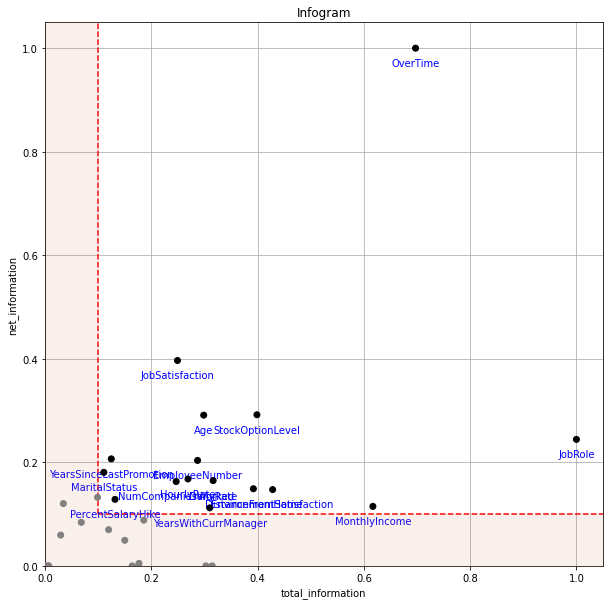

In [26]:
# Infogram
from h2o.estimators.infogram import H2OInfogram
ig = H2OInfogram(model_id='infogram.hex')
ig.train(y=response, x=predictors, training_frame=train)
ig.plot();

In [27]:
ig_scores = ig.get_admissible_score_frame()
ig_scores[ig_scores['admissible'] == 0]

column,admissible,admissible_index,total_information,net_information,cmi_raw
TotalWorkingYears,0,0.222443,0.314582,0,0
YearsAtCompany,0,0.214139,0.302838,0,0
MonthlyRate,0,0.145553,0.185945,0.0882957,0.00409598
EducationField,0,0.125147,0.176917,0.00488821,0.000226761
WorkLifeBalance,0,0.124232,0.175691,0,0
JobLevel,0,0.116942,0.0989491,0.132514,0.00614726
JobInvolvement,0,0.115977,0.164017,0,0
BusinessTravel,0,0.11179,0.150151,0.0494836,0.00229551
RelationshipSatisfaction,0,0.0980767,0.119814,0.069876,0.0032415
Gender,0,0.0885763,0.0345159,0.120417,0.00558606


In [28]:
df['TotalWorkingYears'].cor(df).as_data_frame().transpose().sort_values(by=0, ascending=False).head()

,0
TotalWorkingYears,1.000000
JobLevel,0.782208
MonthlyIncome,0.772893
Age,0.680381
YearsAtCompany,0.628133


# Model Selection Toolbox

Note: Model selection with MaxR and AllSubsets modes are only supported for regression so the target below has been changed to `MonthlyIncome1.

In [29]:
from h2o.estimators import H2OModelSelectionEstimator

glm_maxr = H2OModelSelectionEstimator(max_predictor_number=7,
                                      seed=1234,
                                      mode="maxr",
                                      remove_collinear_columns=True
                                     )
glm_maxr.train(x=predictors, y="MonthlyIncome", training_frame=train)

modelselection Model Build progress: |███████████████████████████████████████████| (done) 100%
Model Details
H2OModelSelectionEstimator :  Model Selection
Model Key:  ModelSelection_model_python_1649175047335_1598


ModelSelection Model Summary: summary


,,best_r2_value,predictor_names
0,with 1 predictors,0.904440,JobLevel
1,with 2 predictors,0.941696,"JobRole.Healthcare Representative, JobRole.Human Resources, JobRol..."
2,with 3 predictors,0.942665,"JobRole.Healthcare Representative, JobRole.Human Resources, JobRol..."
3,with 4 predictors,0.942969,"JobRole.Healthcare Representative, JobRole.Human Resources, JobRol..."
4,with 5 predictors,0.943262,"JobRole.Healthcare Representative, JobRole.Human Resources, JobRol..."
5,with 6 predictors,0.943455,"JobRole.Healthcare Representative, JobRole.Human Resources, JobRol..."
6,with 7 predictors,0.943622,"JobRole.Healthcare Representative, JobRole.Human Resources, JobRol..."


# Build Uplift Model

We will build our model to predict Attrition but within the context that their travel could be reduced from frequently traveling to infrequent or no travel.  We want to see which employees would not quit if they were offered a reduction in travel.

In [30]:
train['Treatment'] = (train['BusinessTravel'] != 'Travel_Frequently').asfactor()

In [31]:
from h2o.estimators import H2OUpliftRandomForestEstimator
uplift_model = H2OUpliftRandomForestEstimator(treatment_column='Treatment',
                                              seed=1234,
                                              model_id='uplift.hex')

uplift_model.train(y=response, x=predictors, training_frame=train);

upliftdrf Model Build progress: |████████████████████████████████████████████████| (done) 100%


The predictions below include `uplift_predict`. This is how much the likelihood of churn would change if they were offered the "Treatment".  Any rows with negative `uplift_predict` means the employee is less likely to quit if their travel was reduced (Treatment was applied).

In [32]:
pred = uplift_model.predict(valid)
pred.head()

upliftdrf prediction progress: |█████████████████████████████████████████████████| (done) 100%


uplift_predict,No,Yes
-0.156621,0.219569,0.37619
-0.102863,0.0993837,0.202246
-0.0803249,0.295379,0.375704
-0.0916111,0.352722,0.444333
-0.0898992,0.205886,0.295785
-0.137883,0.177137,0.31502
-0.137844,0.135979,0.273824
-0.0513436,0.301501,0.352845
-0.0340998,0.365908,0.400008
-0.126472,0.298195,0.424667


In [33]:
targeted_employees = valid[(pred['uplift_predict'] < 0) & (pred['Yes'] > 0.5)]
print("# of Employees to be targeted by travel change: {}".format(len(targeted_employees)))

# of Employees to be targeted by travel change: 10


# Build RuleFit Model

In [34]:
from h2o.estimators.rulefit import H2ORuleFitEstimator

rules_model = H2ORuleFitEstimator(model_id='rulefit.hex', seed=1234,
                                  max_num_rules=5, max_rule_length=5, model_type="rules")
rules_model.train(training_frame=train, y=response, x=predictors);

rulefit Model Build progress: |██████████████████████████████████████████████████| (done) 100%


In [35]:
rules = rules_model.rule_importance().as_data_frame()

In [36]:
import pandas as pd
pd.set_option('display.max_colwidth', 0)

In [37]:
rules

,,variable,coefficient,support,rule
0,,M1T7N35,-0.744605,0.502258,(NumCompaniesWorked < 4.5 or NumCompaniesWorked is NA) & (OverTime in {No} or OverTime is NA) & (TotalWorkingYears < 38.5 or TotalWorkingYears is NA) & (TotalWorkingYears >= 2.5 or TotalWorkingYears is NA)
1,,M2T37N58,-0.654029,0.558266,(JobInvolvement >= 1.5 or JobInvolvement is NA) & (MonthlyIncome >= 1972.5 or MonthlyIncome is NA) & (OverTime in {No} or OverTime is NA) & (YearsSinceLastPromotion < 14.5 or YearsSinceLastPromotion is NA) & (YearsWithCurrManager >= 0.5 or YearsWithCurrManager is NA)
2,,M1T18N34,-0.404632,0.657633,(Age >= 21.5 or Age is NA) & (JobInvolvement >= 1.5 or JobInvolvement is NA) & (OverTime in {No} or OverTime is NA) & (YearsSinceLastPromotion < 14.5 or YearsSinceLastPromotion is NA)
3,,M0T19N20,-0.167408,0.656730,(OverTime in {No} or OverTime is NA) & (TotalWorkingYears >= 2.5 or TotalWorkingYears is NA) & (YearsAtCompany < 30.5 or YearsAtCompany is NA)


# Explain

In [38]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator

gbm = H2OGradientBoostingEstimator(model_id='gbm.hex')
gbm.train(y=response, x=predictors, training_frame=train);

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


PartialDependencePlot progress: |████████████████████████████████████████████████| (done) 100%


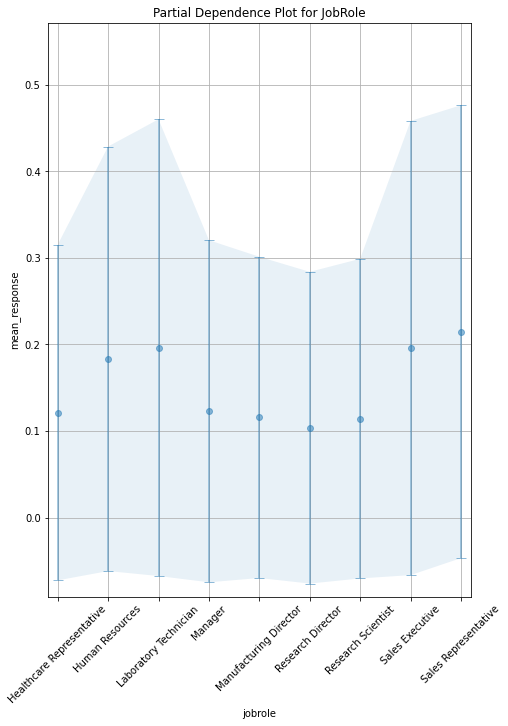

In [41]:
gbm.partial_plot(train, cols=["JobRole"]);

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## gbm.hex


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.15403322650272994: 


,,No,Yes,Error,Rate
0,No,245.0,64.0,0.2071,(64.0/309.0)
1,Yes,17.0,37.0,0.3148,(17.0/54.0)
2,Total,262.0,101.0,0.2231,(81.0/363.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

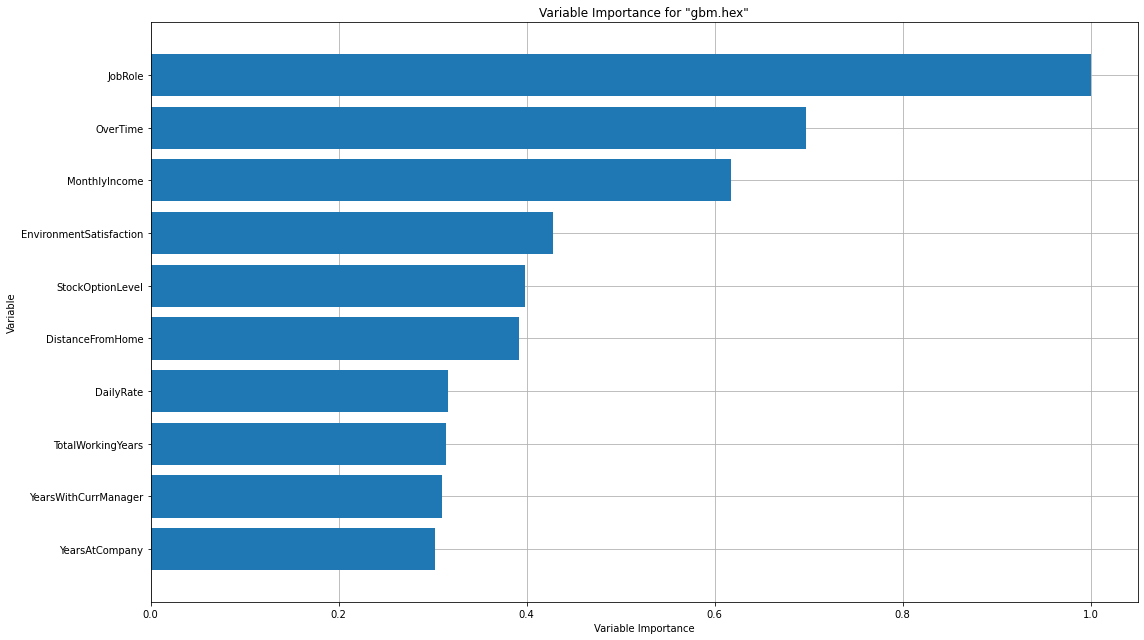

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

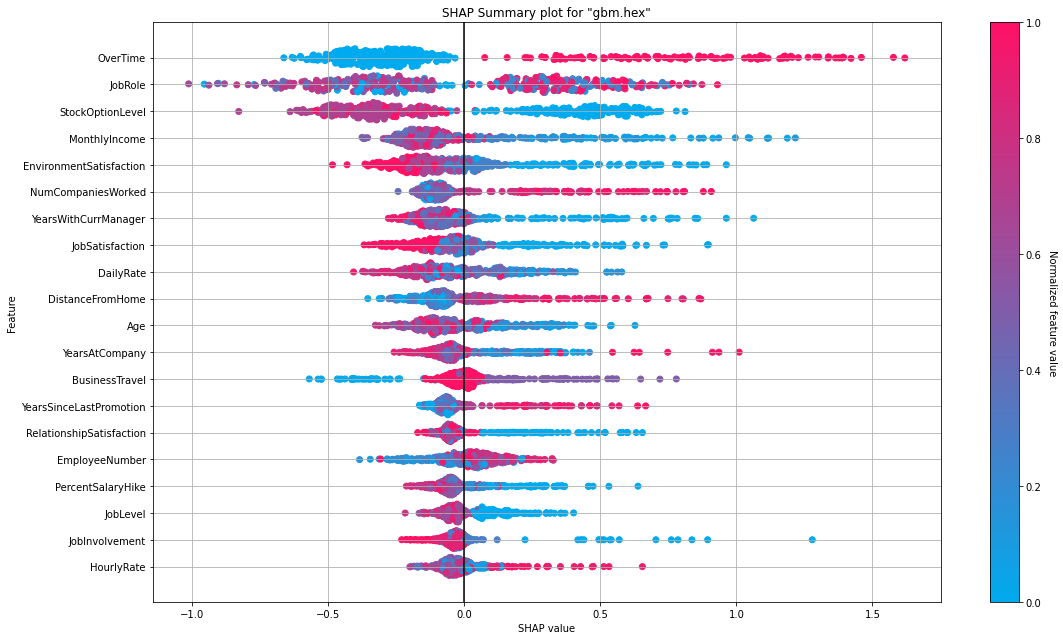

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

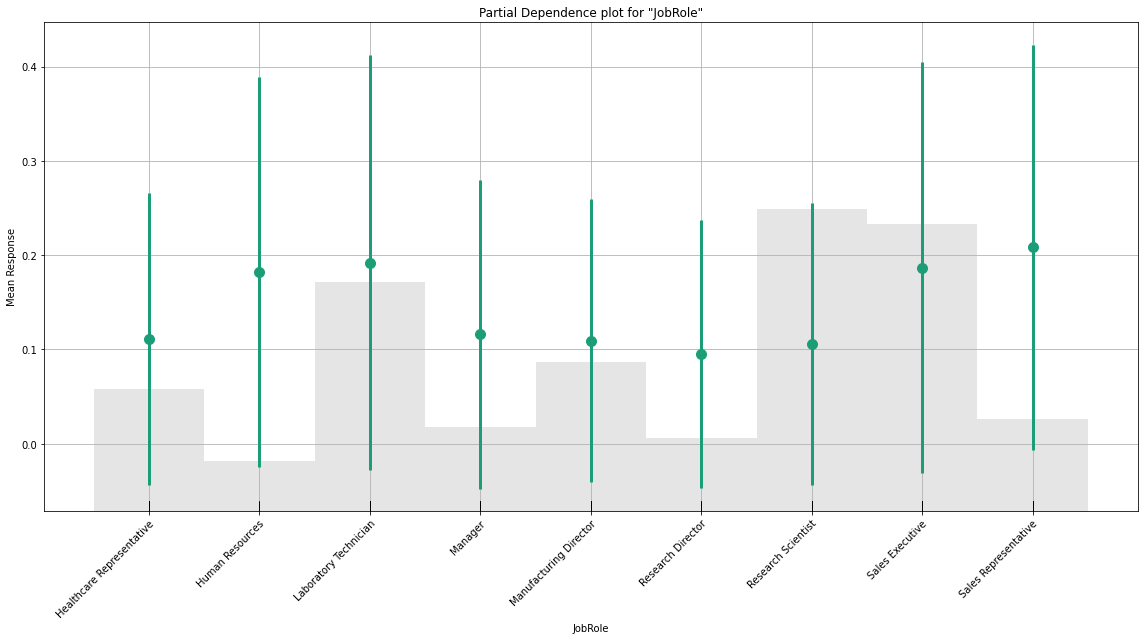

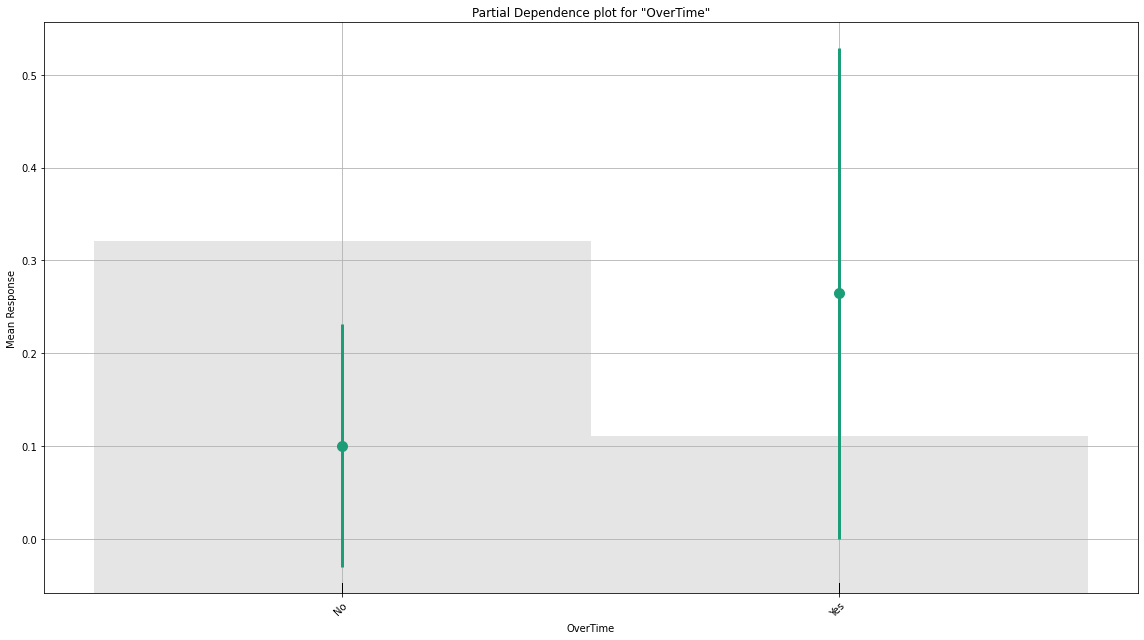

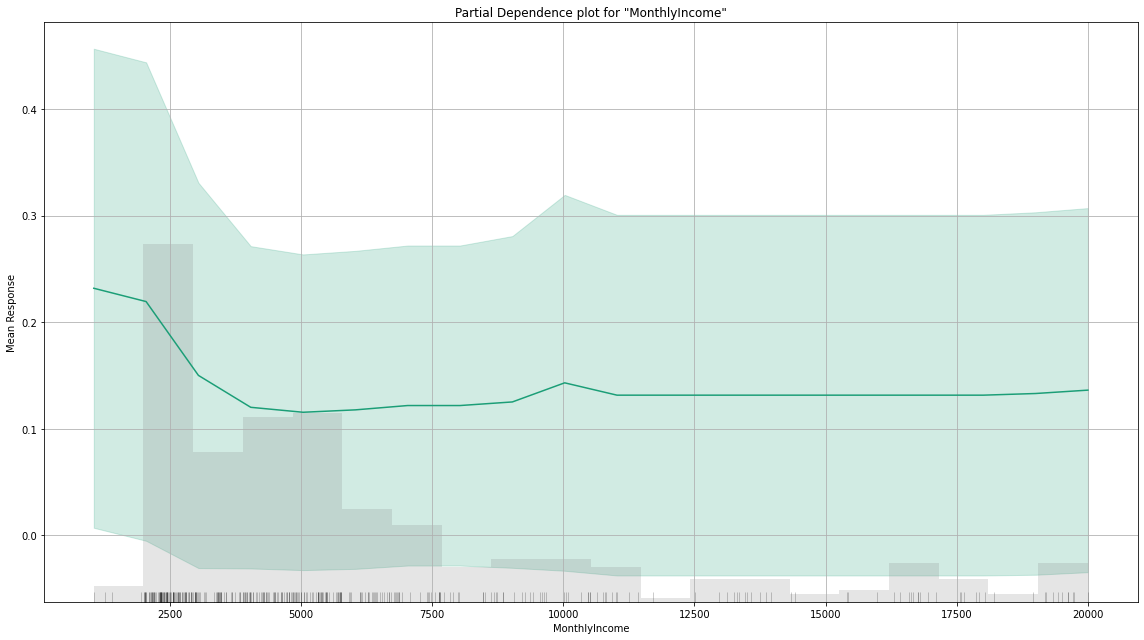

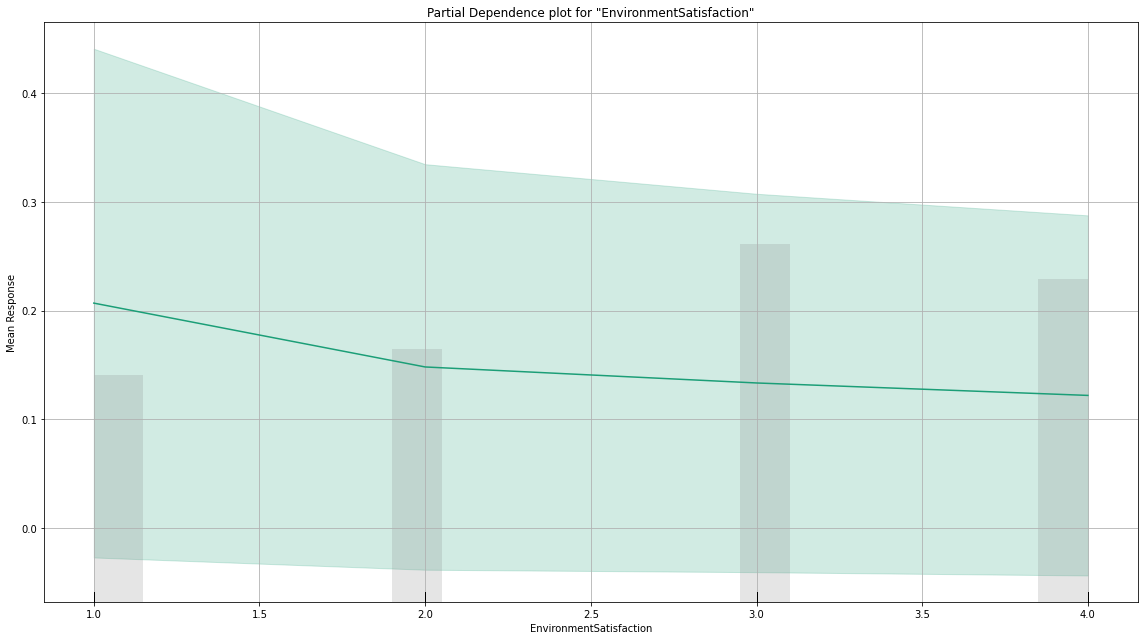

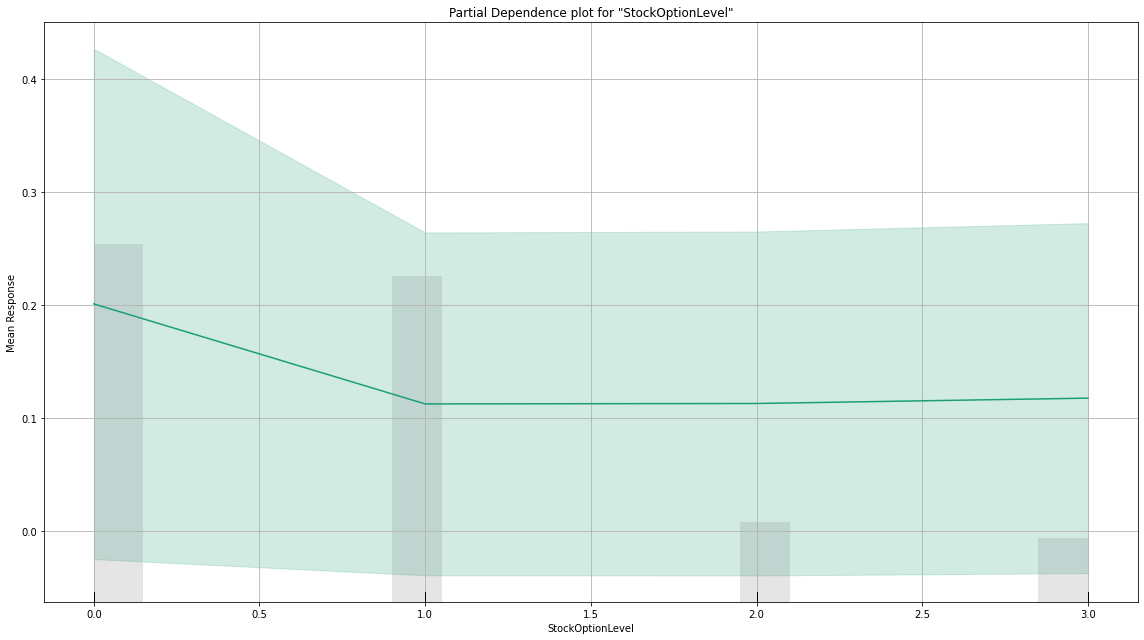

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## gbm.hex


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.15403322650272994: 


,,No,Yes,Error,Rate
0,No,245.0,64.0,0.2071,(64.0/309.0)
1,Yes,17.0,37.0,0.3148,(17.0/54.0)
2,Total,262.0,101.0,0.2231,(81.0/363.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

In [42]:
gbm.explain(valid)

# Download MOJO

Now we will download the MOJO for deployment.

In [ ]:
gbm.download_mojo()

In [21]:
h2o.cluster().shutdown()

H2O session _sid_97db closed.
